In [1]:
!pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1c/19/bf19123baf16a55fd38cbb100b5a49380b9b6db7279987034689d11254c7/yfinance-0.2.32-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/b6/2c/e391d6d57bbd837d383a6b69b54ecb4768d75b31d8bc7a380b4b4afe4cb2/frozendict-2.3.10-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.9 MB 1.8 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/2.9 MB 2.7 MB/s eta 0:00:01
     -------- ------------------------------- 0.6/2.9 MB 3.9 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/2.9 MB 5.3 MB/s eta 0:00:01
     ----------------- ---------------------- 1.3/2.9 MB 6.0 MB/s eta 0:00:01
     ----------------- ---------------------- 1.3

In [4]:
import yfinance as yf
data = yf.download("AMZN", period="12mo")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-05,93.050003,94.059998,90.820000,91.010002,91.010002,71535500
2022-12-06,90.500000,91.040001,87.900002,88.250000,88.250000,75503600
2022-12-07,88.339996,89.889999,87.480003,88.459999,88.459999,68086900
2022-12-08,89.239998,90.860001,87.879997,90.349998,90.349998,73305900
2022-12-09,88.900002,90.300003,88.629997,89.089996,89.089996,67398500
...,...,...,...,...,...,...
2023-11-28,146.979996,147.600006,145.529999,147.029999,147.029999,42711700
2023-11-29,147.850006,148.539993,145.970001,146.320007,146.320007,40610900
2023-11-30,144.759995,146.929993,144.330002,146.089996,146.089996,65814000


In [5]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [8]:
df = data['Close']
df

Date
2022-12-05     91.010002
2022-12-06     88.250000
2022-12-07     88.459999
2022-12-08     90.349998
2022-12-09     89.089996
                 ...    
2023-11-28    147.029999
2023-11-29    146.320007
2023-11-30    146.089996
2023-12-01    147.029999
2023-12-04    144.839996
Name: Close, Length: 251, dtype: float64

In [9]:
import matplotlib.pyplot as plt

In [10]:
df1 = df.reset_index()
df1

,Date,Close
0,2022-12-05,91.010002
1,2022-12-06,88.250000
2,2022-12-07,88.459999
3,2022-12-08,90.349998
4,2022-12-09,89.089996
...,...,...
246,2023-11-28,147.029999
247,2023-11-29,146.320007
248,2023-11-30,146.089996
249,2023-12-01,147.029999


In [11]:
df1.dtypes      ## to convert to datetime pd.to_datetime(data['date'])

Date     datetime64[ns]
Close           float64
dtype: object

In [13]:
df1['day'] = df1['Date'].dt.day
df1

,Date,Close,day
0,2022-12-05,91.010002,5
1,2022-12-06,88.250000,6
2,2022-12-07,88.459999,7
3,2022-12-08,90.349998,8
4,2022-12-09,89.089996,9
...,...,...,...
246,2023-11-28,147.029999,28
247,2023-11-29,146.320007,29
248,2023-11-30,146.089996,30
249,2023-12-01,147.029999,1


In [15]:
df1['month'] = df1['Date'].dt.month
df1['weekday'] = df1['Date'].dt.day_name()
df1

,Date,Close,day,month,weekday
0,2022-12-05,91.010002,5,12,Monday
1,2022-12-06,88.250000,6,12,Tuesday
2,2022-12-07,88.459999,7,12,Wednesday
3,2022-12-08,90.349998,8,12,Thursday
4,2022-12-09,89.089996,9,12,Friday
...,...,...,...,...,...
246,2023-11-28,147.029999,28,11,Tuesday
247,2023-11-29,146.320007,29,11,Wednesday
248,2023-11-30,146.089996,30,11,Thursday
249,2023-12-01,147.029999,1,12,Friday


<Axes: xlabel='day'>

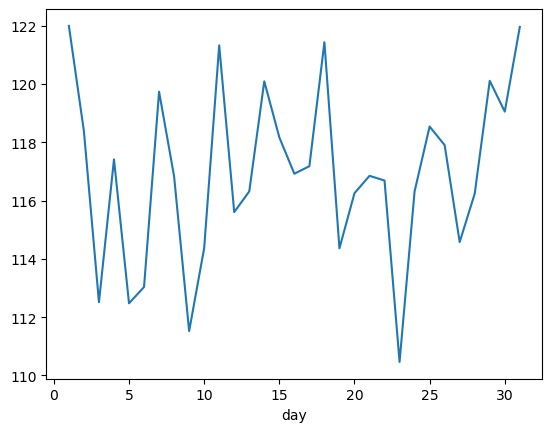

In [17]:
df1.groupby('day')['Close'].mean().plot()

In [18]:
df1.groupby('weekday')['Close'].mean().sort_index()

weekday
Friday       117.324117
Monday       118.370870
Thursday     115.917843
Tuesday      115.929412
Wednesday    116.208463
Name: Close, dtype: float64

NameError: name 'fig_size' is not defined

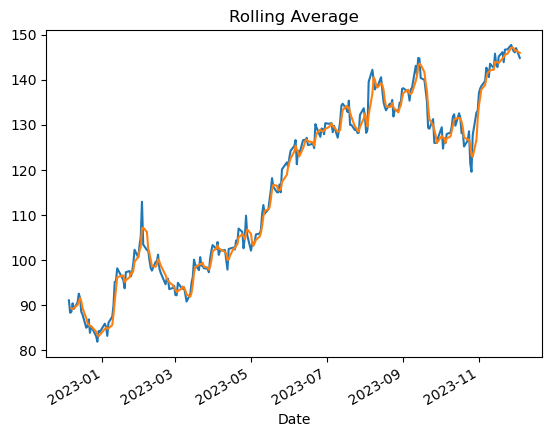

In [24]:
df.plot()
df.rolling(3).mean().plot()  # 3 days rolling average..moving average
plt.title("Rolling Average")
plt.figure(fig_size(12,3))